# MAIN


In [ ]:
import cv2
import dlib
import numpy as np
import csv

def detect_pupils_and_save_to_csv(output_csv, write_frequency=10, pixels_per_mm=None):
    cap = cv2.VideoCapture(0)
    detector = dlib.get_frontal_face_detector()
    predictor = dlib.shape_predictor("shape_predictor_68_face_landmarks.dat")

    with open(output_csv, 'w', newline='') as csvfile:
        fieldnames = ['Left_Pupil_Circumference_mm', 'Right_Pupil_Circumference_mm',
                      'Left_Pupil_Landmarks', 'Right_Pupil_Landmarks']
        writer = csv.DictWriter(csvfile, fieldnames=fieldnames)
        writer.writeheader()

        left_pupil_circumference_mm = 0
        right_pupil_circumference_mm = 0

        frame_count = 0

        while True:
            ret, frame = cap.read()
            if not ret:
                print("Failed to capture frame")
                break

            gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
            faces = detector(gray)

            for face in faces:
                landmarks = predictor(gray, face)

                left_eye_landmarks = np.array([(landmarks.part(i).x, landmarks.part(i).y) for i in range(36, 42)])
                right_eye_landmarks = np.array([(landmarks.part(i).x, landmarks.part(i).y) for i in range(42, 48)])

                left_eye_centroid = np.mean(left_eye_landmarks, axis=0, dtype=int)
                right_eye_centroid = np.mean(right_eye_landmarks, axis=0, dtype=int)

                left_pupil_diameter_px = int(np.linalg.norm(left_eye_landmarks[0] - left_eye_landmarks[3]) * 0.5)
                right_pupil_diameter_px = int(np.linalg.norm(right_eye_landmarks[0] - right_eye_landmarks[3]) * 0.5)

                if pixels_per_mm:
                    left_pupil_diameter_mm = left_pupil_diameter_px / pixels_per_mm
                    right_pupil_diameter_mm = right_pupil_diameter_px / pixels_per_mm

                    left_pupil_circumference_mm = np.pi * left_pupil_diameter_mm
                    right_pupil_circumference_mm = np.pi * right_pupil_diameter_mm

                    cv2.putText(frame, f'Left_Pupil_Circumference: {left_pupil_circumference_mm:.2f} mm', (10, 30),
                                cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 0, 255), 2)
                    cv2.putText(frame, f'Right_Pupil_Circumference: {right_pupil_circumference_mm:.2f} mm', (10, 60),
                                cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 0, 255), 2)

                cv2.circle(frame, tuple(left_eye_centroid), left_pupil_diameter_px // 2, (0, 255, 0), 2)
                cv2.circle(frame, tuple(right_eye_centroid), right_pupil_diameter_px // 2, (0, 255, 0), 2)

                if frame_count % write_frequency == 0 and pixels_per_mm:
                    left_pupil_landmarks_str = ';'.join([f'{x},{y}' for x, y in left_eye_landmarks])
                    right_pupil_landmarks_str = ';'.join([f'{x},{y}' for x, y in right_eye_landmarks])
                    writer.writerow({'Left_Pupil_Landmarks': left_pupil_landmarks_str,
                                     'Right_Pupil_Landmarks': right_pupil_landmarks_str,
                                     'Left_Pupil_Circumference_mm': left_pupil_circumference_mm,
                                     'Right_Pupil_Circumference_mm': right_pupil_circumference_mm})

            frame_count += 1

            cv2.imshow('Pupil Detection', frame)

            if cv2.waitKey(1) & 0xFF == ord('q'):
                break

    cap.release()
    cv2.destroyAllWindows()

output_csv = 'pupil_data.csv'
write_frequency = 5

# Adjust this value based on your reference object, e.g., if 1 mm equals 20 pixels in your setup:
pixels_per_mm = 15

detect_pupils_and_save_to_csv(output_csv, write_frequency, pixels_per_mm)


## AUTOMATIC PLOT

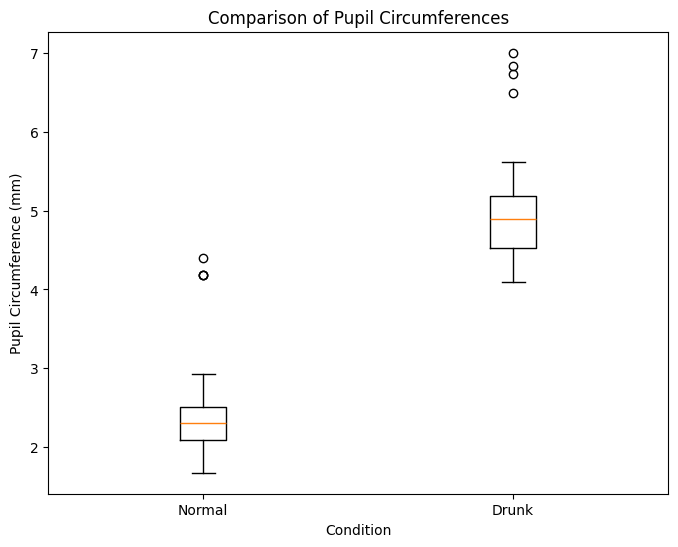

T-statistic: -21.562394088455264
P-value: 1.4927640412776557e-40


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

# Load data from CSV
def load_pupil_data(csv_file):
    df = pd.read_csv(csv_file)
    A1_normal = df['Left_Pupil_Circumference_mm'].dropna().values
    A2_normal = df['Right_Pupil_Circumference_mm'].dropna().values
    return A1_normal, A2_normal

# Generate synthetic drunk data
def generate_synthetic_drunk_data(A1_normal, A2_normal, range_min=2, range_max=3):
    A1_drunk = A1_normal + np.random.uniform(range_min, range_max, size=A1_normal.shape)
    A2_drunk = A2_normal + np.random.uniform(range_min, range_max, size=A2_normal.shape)
    return A1_drunk, A2_drunk

# Main function
csv_file = 'pupil_data.csv'  # Change this to your actual file
A1_normal, A2_normal = load_pupil_data(csv_file)
A1_drunk, A2_drunk = generate_synthetic_drunk_data(A1_normal, A2_normal)

# Combine data for visualization
normal_data = np.concatenate((A1_normal, A2_normal))
drunk_data = np.concatenate((A1_drunk, A2_drunk))

# Box plot
plt.figure(figsize=(8, 6))
plt.boxplot([normal_data, drunk_data], labels=['Normal', 'Drunk'])
plt.title('Comparison of Pupil Circumferences')
plt.xlabel('Condition')
plt.ylabel('Pupil Circumference (mm)')
plt.show()

# Statistical Test
t_statistic, p_value = stats.ttest_ind(normal_data, drunk_data)
print("T-statistic:", t_statistic)
print("P-value:", p_value)


## MANUAL PLOT 


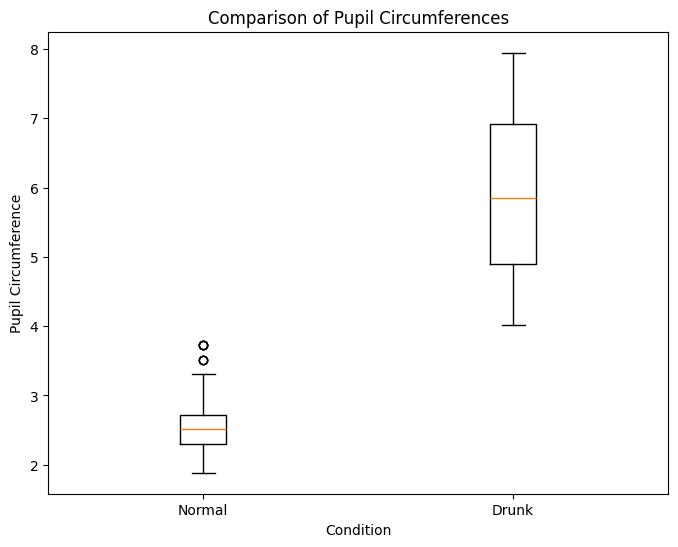

T-statistic: -30.204044738618688
P-value: 7.729696117068305e-92


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# Arrays for normal pupil circumferences
A1_normal = np.array([
    2.3038346126325147, 2.0943951023931953, 2.3038346126325147, 2.3038346126325147, 2.3038346126325147, 
    2.3038346126325147, 2.0943951023931953, 2.0943951023931953, 1.8849555921538759, 1.8849555921538759, 
    1.8849555921538759, 2.0943951023931953, 2.0943951023931953, 2.3038346126325147, 2.3038346126325147, 
    2.0943951023931953, 2.7227136331111543, 2.7227136331111543, 2.7227136331111543, 2.5132741228718345, 
    2.7227136331111543, 2.7227136331111543, 2.5132741228718345, 2.5132741228718345, 2.3038346126325147, 
    2.5132741228718345, 2.5132741228718345, 2.3038346126325147, 2.5132741228718345, 2.3038346126325147, 
    2.5132741228718345, 2.5132741228718345, 2.5132741228718345, 2.7227136331111543, 2.3038346126325147, 
    2.5132741228718345, 2.7227136331111543, 2.7227136331111543, 2.7227136331111543, 2.5132741228718345, 
    2.5132741228718345, 3.7227136331111543, 2.3038346126325147, 2.7227136331111543, 2.5132741228718345, 
    2.5132741228718345, 3.7227136331111543, 2.7227136331111543, 2.7227136331111543, 2.5132741228718345, 
    2.7227136331111543, 2.7227136331111543, 2.7227136331111543, 3.5132741228718345, 2.7227136331111543, 
    2.7227136331111543, 3.5132741228718345, 2.7227136331111543, 2.7227136331111543, 2.7227136331111543
])
A2_normal =np.array([
    2.0943951023931953, 2.3038346126325147, 2.3038346126325147, 2.3038346126325147, 2.3038346126325147, 
    2.3038346126325147, 2.0943951023931953, 2.0943951023931953, 1.8849555921538759, 1.8849555921538759, 
    2.0943951023931953, 2.0943951023931953, 2.3038346126325147, 2.3038346126325147, 2.3038346126325147, 
    2.3038346126325147, 2.7227136331111543, 2.7227136331111543, 2.7227136331111543, 2.7227136331111543, 
    2.7227136331111543, 2.7227136331111543, 2.5132741228718345, 2.5132741228718345, 2.5132741228718345, 
    2.5132741228718345, 2.5132741228718345, 2.5132741228718345, 2.5132741228718345, 2.3038346126325147, 
    2.3038346126325147, 3.5132741228718345, 2.7227136331111543, 2.3038346126325147, 2.3038346126325147, 
    2.5132741228718345, 2.3038346126325147, 2.5132741228718345, 2.3038346126325147, 2.5132741228718345, 
    2.3038346126325147, 3.3038346126325147, 2.7227136331111543, 2.3038346126325147, 2.7227136331111543, 
    2.5132741228718345, 2.5132741228718345, 2.7227136331111543, 2.7227136331111543, 2.7227136331111543, 
    2.5132741228718345, 2.7227136331111543, 3.7227136331111543, 3.7227136331111543, 2.7227136331111543, 
    2.5132741228718345, 2.7227136331111543, 2.5132741228718345, 2.5132741228718345, 2.5132741228718345
])
# Arrays for drunk pupil circumferences
A1_drunk= np.array([5.49816048, 7.80285723, 6.92797577, 6.39463394, 4.62407456,
        4.62397808, 4.23233445, 7.46470458, 6.40446005, 6.83229031,
        4.08233798, 7.87963941, 7.32977056, 4.84935644, 4.72729987,
        4.73361804, 5.21696897, 6.09902573, 5.72778007, 5.16491656,
        6.44741158, 4.55797544, 5.16857859, 5.46544737, 5.82427994,
        7.14070385, 4.79869513, 6.05693775, 6.36965828, 4.18580165,
        6.43017941, 4.68209649, 4.26020637, 7.79554215, 7.86252813,
        7.23358939, 5.21845508, 4.39068846, 6.73693211, 5.76060997,
        4.48815294, 5.98070764, 4.13755408, 7.63728161, 5.03511993,
        6.65008914, 5.2468443 , 6.08027208, 6.18684112, 4.73941782,
        7.87833851, 7.10053129, 7.75799577, 7.5793094 , 6.39159992,
        7.68749694, 4.35397001, 4.78393145, 4.18090916, 5.30132132,
        5.55470916, 5.08539613, 7.31495004, 5.42701331, 5.12373804,
        6.17078433, 4.5636969 , 7.20878792, 4.29820257, 7.94754775,
        7.08897908, 4.79486273, 4.02208847, 7.26184571, 6.82742938,
        6.91602867, 7.08508139, 4.29617861, 5.43386291, 4.46347624,
        7.4524137 , 6.49319251, 5.3235921 , 4.2542334 , 5.24392929,
        5.30073329, 6.91842471])
A2_drunk = np.array([6.55022989, 7.54885097, 5.8888597 , 4.47837698, 6.85297915,
       7.04314019, 6.24510879, 7.08386872, 5.97518239, 6.09093132,
       5.71016407, 4.10167651, 4.43156571, 4.12571674, 6.54564165,
       5.25742392, 6.03428276, 7.6302659 , 4.99716892, 5.64153169,
       7.02220455, 4.91519266, 4.30791964, 5.15900581, 4.64488515,
       7.71879061, 7.23248152, 6.53361503, 7.48584236, 7.21468831,
       4.74628024, 7.57023599, 6.15736897, 7.22976062, 7.5843652 ,
       5.2720139 , 4.4402077 , 4.91174065, 5.70843115, 7.27205906,
       7.44292233, 4.02780852, 6.04298921, 5.66964401, 4.88843124,
       4.47946147, 5.35046069, 7.77163882, 5.29281173, 6.07516249,
       6.81207584, 5.45451841, 7.88712833, 7.84978918, 5.00712918,
       5.98899402, 5.20351324, 5.13936198, 4.14754779, 6.43825734,
       6.01071609, 4.205915  , 5.11458586, 7.63306354, 4.95824756,
       4.57957949, 5.95781104, 7.94260182, 4.96822109, 6.68854219,
       7.04647846, 4.95055018, 6.91286539, 5.47113253, 6.52922332,
       6.53411884, 6.14309874, 4.36115908, 7.34120998, 5.28312026,
       4.74607404, 4.16310057, 6.36357177, 6.71025745, 4.06635132,
       6.04837223, 4.9059831 ])

# Combine normal and drunk data
normal_data = np.concatenate((A1_normal, A2_normal))
drunk_data = np.concatenate((A1_drunk, A2_drunk))

# Create labels for box plot
labels = ['Normal'] * len(normal_data) + ['Drunk'] * len(drunk_data)

# Combine all data for box plot bujuka kojuka klklmcll she is asking whether you are interested? i said we 3 attended internshi that is because they selected people above not gpa cgpa 8.6
all_data = np.concatenate((normal_data, drunk_data))

# Plotting box plot 
plt.figure(figsize=(8, 6))
plt.boxplot([normal_data, drunk_data], labels=['Normal', 'Drunk'])
plt.title('Comparison of Pupil Circumferences')
plt.xlabel('Condition')
plt.ylabel('Pupil Circumference')
plt.show()


# Perform t-test to check for , anova 
t_statistic, p_value = stats.ttest_ind(normal_data, drunk_data)
print("T-statistic:", t_statistic)
print("P-value:", p_value)
